In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv("data.txt", sep='  ', header=None)
data.iloc[0,:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


0        1.138
1        3.000
2      289.964
3     1349.489
4     6677.380
5        7.584
6        7.584
7      464.006
8      288.000
9      550.563
10       1.096
11       0.998
12       5.947
13       1.019
14       7.137
15       0.082
16       0.950
17       0.975
Name: 0, dtype: float64

In [8]:
data = data.drop(columns = [8,11])

In [9]:
correlation = data.corr("pearson")

In [10]:
a = abs(correlation[16])
a

0     5.534971e-18
1     0.000000e+00
2     2.978258e-03
3     1.369908e-03
4     1.883800e-02
5     7.535000e-04
6     7.535000e-04
7     3.962512e-02
9     4.717657e-02
10    8.167586e-03
12    8.327871e-03
13    3.528524e-02
14    3.203662e-02
15    1.366765e-02
16    1.000000e+00
17    3.415191e-17
Name: 16, dtype: float64

In [11]:
data = data.rename(columns = {0:"Lever position",
                            1:"Ship speed",
                            2:"(GT) shaft torque",
                            3:"GT rate of revolutions",
                            4:"Gas Generator rate of revolutions",
                            5:"Starboard Propeller Torque",
                            6:"Port Propeller Torque",
                            7:"Turbine exit temperature",
                            #8:"GT Compressor inlet air temperature",
                            9:"GT Compressor outlet air temperature",
                            10:"HP Turbine exit pressure",
                            #11:"GT Compressor inlet air pressure",
                            12:"GT Compressor outlet air pressure",
                            13:"GT exhaust gas pressure",
                            14:"Turbine Injecton Control",
                            15:"Fuel flow",
                            16:"GT Compressor decay coeff",
                            17:"GT Turbine decay coeff"})

In [12]:
Y = data["GT Compressor decay coeff"]
#Y2 = data["GT Turbine decay coeff"]
X1 = data["GT Compressor outlet air pressure"]
X2 = data["GT Compressor outlet air temperature"]
#X3 = data["Turbine exit temperature"]
X4 = data["Turbine Injecton Control"]
X5 = data["Fuel flow"]
X6 = data["HP Turbine exit pressure"]
X7 = data["Gas Generator rate of revolutions"]
X8 = data["(GT) shaft torque"]

In [13]:
Y =(Y-Y.min())/(Y.max()-Y.min())
X1 =(X1-X1.min())/(X1.max()-X1.min())
X2 =(X2-X2.min())/(X2.max()-X2.min())
X4 =(X4-X4.min())/(X4.max()-X4.min())
X5 =(X5-X5.min())/(X5.max()-X5.min())
X6 =(X6-X6.min())/(X6.max()-X6.min())
X7 =(X7-X7.min())/(X7.max()-X7.min())
X8 =(X8-X8.min())/(X8.max()-X8.min())

y = np.array(Y)
x1 = np.array(X1)
x2 = np.array(X2)
x4 = np.array(X4)
x5 = np.array(X5)
x6 = np.array(X6)
x7 = np.array(X7)
x8 = np.array(X8)

In [14]:
 y_train, y_test, x1_train, x1_test, x2_train, x2_test,x4_train, x4_test, x5_train, x5_test,x6_train, x6_test,x7_train, x7_test,x8_train, x8_test= train_test_split(y,x1,x2,x4,x5,x6,x7,x8,test_size = 0.2)

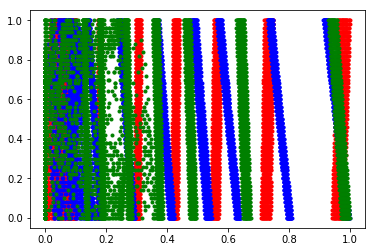

In [15]:
plt.plot(x1_train,y_train,"r.",
         x2_train,y_train,"b.",
         x4_train,y_train,"g." )

In [16]:
def hypothesis(x1,x2,x4,x5,x6,x7,x8,a,b,c,d,e,f,g,h):
    return a * x1 + b*x2 + c*x4 +d*x5 + e*x6 +f*x7 + g * x8 + h 

In [17]:
def error(y,x1,x2,x4,x5,x6,x7,x8,a,b,c,d,e,f,g,h):
    e = 0
    m = len(x1)
    
    for i in range(m):
        e += np.power((hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h)- y[i]),2)
    return (1/2*m) * e    

In [18]:
def step_gradient(y,x1,x2,x4,x5,x6,x7,x8,a,b,c,d,e,f,g,h,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    grad_f = 0
    grad_g = 0
    grad_h = 0
    m = len(x1)
    
    for i in range(m):
        grad_a += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x1[i]
        grad_b += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x2[i]
        grad_c += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x4[i]
        grad_d += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x5[i]
        grad_e += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x6[i]
        grad_f += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x7[i]
        grad_g += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) * x7[i]
        grad_h += 1/m * (hypothesis(x1[i],x2[i],x4[i],x5[i],x6[i],x7[i],x8[i],a,b,c,d,e,f,g,h) - y[i]) 
        
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    d = d - (grad_d * learning_rate)
    e = e - (grad_e * learning_rate)
    f = f - (grad_f * learning_rate)
    g = g - (grad_g * learning_rate)
    h = h - (grad_h * learning_rate)
    
    return a, b, c,d,e,f,g,h


In [19]:
def descend(init_a,init_b,init_c,init_d,init_e,init_f,init_g,init_h,x1,x2,x4,x5,x6,x7,x8,learning_rate,iters):
    a= init_a
    b = init_b
    c = init_c
    d = init_d
    e = init_e
    f = init_f
    g = init_g
    h = init_h
    
    for i in range(iters):
        e = error(y,x1,x2,x4,x5,x6,x7,x8,a,b,c,d,e,f,g,h)
        if i%10000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}, d:{d},e:{e},f:{f},g:{g},h:{h}")
            
        a,b,c,d,e,f,g,h = step_gradient(y,x1,x2,x4,x5,x6,x7,x8,a,b,c,d,e,f,g,h,learning_rate)
        
    return a,b,c,d,e,f,g,h
                                

In [ ]:
a = 1
b=1
c=1
d=1
e=1
f=1
g=1
h=1

learning_rate = 0.1
iters = 20000

final_a,final_b,final_c,final_d,final_e,final_f,final_g,final_h = descend(a,b,c,d,e,f,g,h,x1_train,x2_train,x4_train,x5_train,x6_train,x7_train,x8_train,learning_rate,iters)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Error: nan, a: 1, b: 1, c: 1, d:1,e:nan,f:1,g:1,h:1
